## "Week of Oct21" HW [*due prior to the Nov08 TUT*]

## Question 1

Predicter variable xi: The independent variable, which can be arbitrarily chosen or sampled.

Intercept β0: the value of yi when xi = 0, essentially where the line intersects the y-axis.

Slope β1: The rate of change in yi for a unit increase in xi.

Error Term εi: A random error, typically sampled from a normal distribution with mean 0 and some standard deviation 𝜎, representing the noise or randomness in the relationship.

y 
i
​
 =β 
0
​
 +β 
1
​
 x 
i
​
 +ϵ 
i
​


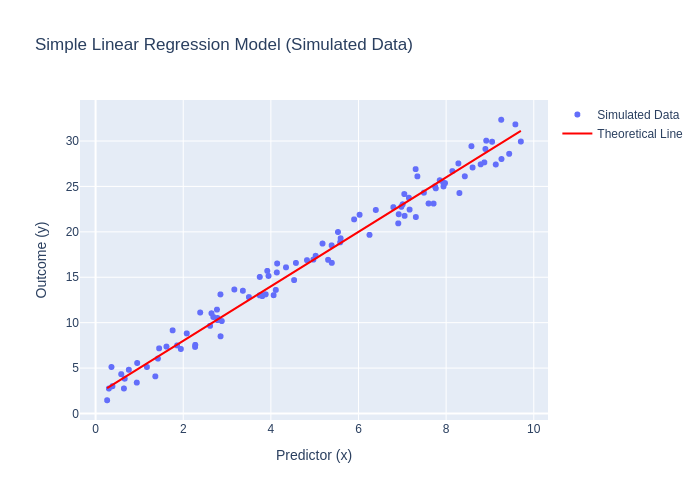

In [1]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Parameters for the model
n = 100  # Number of data points
beta0 = 2  # Intercept
beta1 = 3  # Slope
sigma = 1  # Standard deviation of errors

# Simulate the predictor variables x_i (fixed)
x = stats.uniform.rvs(0, 10, size=n)
# Uniform distribution: a type of probability distribution in which all outcomes 
# are equally likely within a specified range. It’s called "uniform" because 
# every value within the range has the same probability of occurring.
# random values will be drawn uniformly between 0 and 10
# rvs: random variates sampling --> to generate random numbers (samples) from 
# a specified probability distribution.

# Simulate the error terms epsilon_i
errors = stats.norm.rvs(0, sigma, size=n)
# the mean of the normal distribution is 0
# sigma: the stanadard deviation of the normal distribution

# Generate the outcome variable y_i
y = beta0 + beta1 * x + errors

# Visualize the theoretical linear relationship with scatter plot
fig = go.Figure()

# Add the generated data points
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Simulated Data'))

# Add the theoretical regression line (without noise)
y_line = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=y_line, mode='lines', name='Theoretical Line', line=dict(color='red')))

# Add titles and labels
fig.update_layout(title="Simple Linear Regression Model (Simulated Data)",
                  xaxis_title="Predictor (x)",
                  yaxis_title="Outcome (y)")

fig.show(renderer="png")


## Question 2

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf # This library is part of the statsmodels package and is used for specifying and estimating statistical models, particularly linear regression models using formula syntax (e.g., "y ~ x"). The smf module provides a user-friendly way to fit regression models.
import plotly.express as px # this is a ploting library
from scipy import stats

df = pd.DataFrame({'x': x, 'y': y})


# Fit an OLS regression model using statsmodels
model_data_specification = smf.ols("y~x", data=df) 
fitted_model = model_data_specification.fit() 

In [3]:
# Output model sunmaries
fitted_model.summary()  # This method provides a detailed summary of the fitted regression model, including information about the estimated coefficients (intercept and slope), p-values, R-squared, and other statistical metrics.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4337.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           6.03e-83
Time:                        03:59:06   Log-Likelihood:                -162.84
No. Observations:                 100   AIC:                             329.7
Df Residuals:                      98   BIC:                             334.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3434      0.257      9.126      0.000       1.834       2.853
x              2.9422      0.045     65.859      0.000       2.854       3.031
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.038
Skew:                           0.179   Prob(JB):                        0.361
Kurtosis:                       2.399   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
fitted_model.summary().tables[1]  
# This extracts a specific table from the model summary, typically the table with 
# the estimated coefficients for the intercept and slope.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3434,0.257,9.126,0.000,1.834,2.853
x,2.9422,0.045,65.859,0.000,2.854,3.031


In [5]:
fitted_model.params  
# This returns the estimated parameters (i.e., the intercept and slope) of 
# the regression model in a pandas Series format.

Intercept    2.34342
x            2.94222
dtype: float64

In [6]:
fitted_model.params.values  
# This returns the values of the estimated parameters as a NumPy array.

array([2.34341968, 2.9422196 ])

In [7]:
fitted_model.rsquared  
# This returns the R-squared value of the model, which indicates the proportion of 
# the variance in the outcome variable y that is explained by the predictor x. 
# It ranges from 0 to 1, where 1 means the model perfectly explains the data.

0.9779053116506794

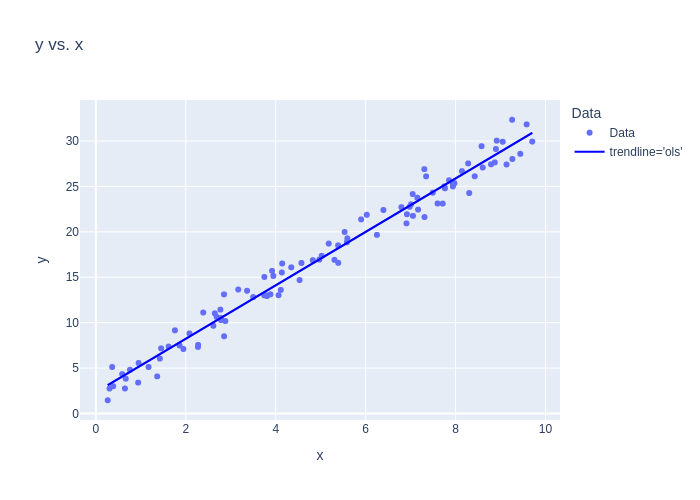

In [8]:
df['Data'] = 'Data' # This is a trick to ensure the data points are labeled in the legend as 'Data'. 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x') # This is a trick to ensure the data points are labeled in the legend as 'Data'.

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Summary

Here’s a summary of our exchanges related to the theoretical Simple Linear Regression model and its implementation:

---

### Summary of Exchanges

1. **Theoretical Explanation of Simple Linear Regression**:
   - We discussed the components of a Simple Linear Regression model, including predictor variables, outcome variables, slope and intercept coefficients, and the error term. 
   - The model combines these elements to generate outcome variables, demonstrating how they can be derived from a normal distribution.

2. **Python Implementation**:
   - I provided Python code using `numpy` and `scipy.stats` to simulate data for a Simple Linear Regression model.
   - The code generated predictor values using a uniform distribution and created error terms sampled from a normal distribution.
   - The outcome variable was calculated using the linear model equation.

3. **Discussion on Distributions**:
   - We explored the differences between normal and uniform distributions and discussed the function `stats.uniform.rvs(0, 10, size=n)`, which samples random values from a uniform distribution between 0 and 10.
   - Similarly, we explained the function `errors = stats.norm.rvs(0, sigma, size=n)`, which samples error terms from a normal distribution.

4. **Pandas DataFrame Creation**:
   - We discussed the line `df = pd.DataFrame({'x': x, 'y': y})`, which creates a pandas DataFrame to organize the simulated data for further analysis.

5. **Model Fitting and Summary**:
   - I explained the outputs of several print statements related to the fitted regression model using `statsmodels`:
     - `fitted_model.summary()`: Provides a comprehensive overview of the model.
     - `fitted_model.summary().tables[1]`: Focuses on the coefficients and their significance.
     - `fitted_model.params`: Prints the model parameters (intercept and slope).
     - `fitted_model.params.values`: Provides the parameter values as an array.
     - `fitted_model.rsquared`: Gives the R-squared value to evaluate model fit.

6. **Visualization**:
   - We discussed visualizing the fitted model using `plotly` and the differences between using `px.scatter` and `go.Figure`.

---

Feel free to use or modify this summary for your homework submission! Let me know if you need any further assistance.

Link

https://chatgpt.com/share/67194503-d258-8010-81bc-fb4f11af1cf4

## Question 3

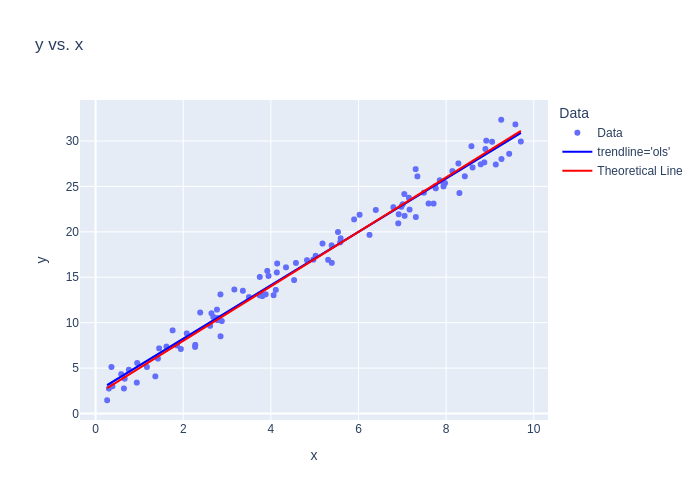

In [9]:
y_line = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=y_line, mode='lines', name='Theoretical Line', line=dict(color='red')))
fig.show(renderer="png")


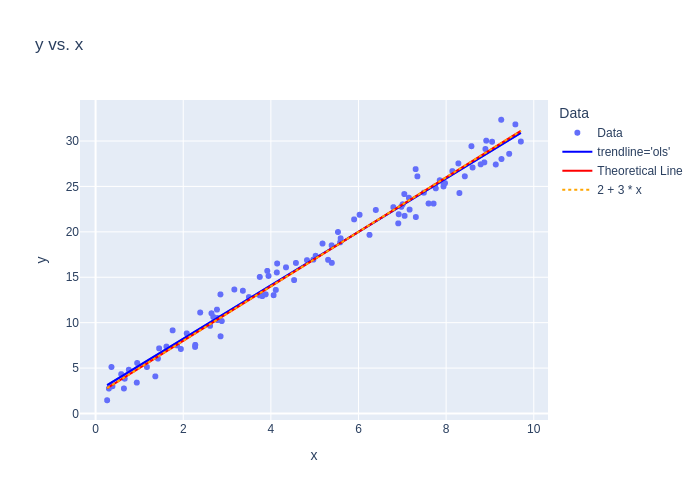

In [10]:
# Adding the theoretical regression line (without noise)
x_range = np.array([df['x'].min(), df['x'].max()])  # X range for the theoretical line
y_line = beta0 + beta1 * x_range  # Calculate y values for the theoretical line
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))  # Add theoretical line in orange

# Display the updated plot
fig.show(renderer="png")


The combined code simulates a dataset based on the theoretical Simple Linear Regression model and fits a regression model using the simulated data. It visually compares the theoretical relationship defined by the regression equation with the observed data.


Theoretical Line: This line represents the true relationship dictated by the model's parameters (intercept 𝛽0 and slope 𝛽1). It is calculated using the equation y=β0​+β1⋅x and does not include any random noise. This line serves as the expected or ideal output if there were no errors in the system. It does not account for any variability or randomness in the data. 

Fitted Line: This line represents the best fit for the observed data, calculated using the ordinary least squares (OLS) regression method. It attempts to capture the underlying trend in the noisy data and may deviate from the theoretical line due to the random errors introduced in the outcome variable 𝑦. The fitted line is derived from the data, reflecting the actual relationship observed after accounting for the noise. The fitted intercept and slope coefficients are estimated based on sample data.

Summary:

Here's a summary of our interactions that you can use for your homework submission:

---

### Homework Assignment Interaction Summary

#### **Question 1: Theoretical Simple Linear Regression Model**
- **Discussion**: We explored the components of a Simple Linear Regression (SLR) model, including the predictor variable (\(x\)), outcome variable (\(y\)), slope (\(\beta_1\)), intercept (\(\beta_0\)), and the error term (\(\epsilon\)). The model combines these to form an outcome sample from a normal distribution: \( y = \beta_0 + \beta_1 x + \epsilon \). 
- **Code Example**:
  - We used `numpy` and `scipy.stats` to simulate the predictor variable \(x\) and errors (\(\epsilon\)) from uniform and normal distributions, respectively. We then visualized the simulated data and the theoretical regression line (without noise) using `plotly.graph_objects`.
  - **Key takeaway**: Theoretical lines do not account for the error term, while real-world data (with error) deviates around this line.

#### **Question 2: Fitted Simple Linear Regression Model**
- **Discussion**: Using the data simulated from the theoretical model, we demonstrated how to fit a Simple Linear Regression model using `statsmodels.formula.api` (smf) for Ordinary Least Squares (OLS) regression. 
- **Key steps**:
  - Created a pandas `DataFrame` with the simulated \(x\) and \(y\) data.
  - Used the `smf.ols` function to specify and fit the regression model.
  - Explored the fitted model’s summary, including interpreting key outputs like the intercept, slope, and R-squared values.
  - Visualized the fitted model using `plotly.express`, displaying the actual data points, the fitted line, and a comparison with the theoretical line.

#### **Question 3: Visual Comparison Between Theoretical and Fitted Models**
- **Discussion**: We compared the **Theoretical Line** (red, solid) with the **Fitted Line** (blue, solid). The key distinction:
  - **Theoretical Line**: Does not include the error term and represents the ideal, noise-free relationship between \(x\) and \(y\).
  - **Fitted Line**: Accounts for the error term and reflects the relationship observed in real-world data, where noise and randomness affect the outcomes.

- **Graphical Explanation**:
  - The **theoretical line** shows the ideal relationship defined by the model.
  - The **fitted line** is derived from actual data using the OLS method, which includes noise and minimizes the differences between observed and predicted values.

---

This summary covers the steps and insights from the exercises we worked on, including the code used, discussions around Ordinary Least Squares (OLS), and visual comparisons between theoretical and fitted models.

Link:

https://chatgpt.com/share/67194503-d258-8010-81bc-fb4f11af1cf4

## Question 4

The theoretical model is represented as: Yi = β0 + β1xi + εi
<br> However, since we don't know the true value of $\beta$ and $\beta_1$, we estimate them using a dataset of (xi, Yi) pairs. The fitted model becomes $\hat{Y}_i$ = $\hat{\beta}_0$ + $\hat{\beta}_1$ $x_i$ , where $\hat{\beta}_0$ and $\hat{\beta}_1$ are the estimated intercept and slope obtained through the regression analysis.
- To find a fitted model, the sum of squared residuals (the differences between observed Yi and predicted $\hat{y}_i$ ) is minimized.The regression algorithm computes the estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ based on the data. 
- Once we have the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can compute the fitted values $\hat{y}_i$ for each observation $x_i$.The fitted value of the observation i is calculated as $\hat{Y}_i$ = $\hat{\beta}_0$ + $\hat{\beta}_1$ $x_i$ 
- In Python, when using a linear regression model (like statsmodels), the fitted model’s fitted values can be accessed via fitted_model.fittedvalues.
- These fitted values are derived directly from the estimated coefficients (found in fitted_model.params) and the predictor variable x from the data. Specifically, the fitted_model.params contains β0 and β1 (along with any other parameters in the case of multiple regression.
- In the summary of the fitted model (fitted_model.summary()), summary().tables[1] contains the parameter estimates: 
    - The first row corresponds to $\hat{\beta}_0$ (the intercept)
    - The second row corresponds to $\hat{\beta}_1$ (the slope for the predictor variable x)
- These values can be retrieved from fitted_model.params or fitted_model.params.values. For a simple linear regression, fitted_model.params[0] is $\hat{\beta}_0$, and fitted_model.params[1] is $\hat{\beta}_1$.

Summary: 

Here's a summary of our recent exchanges related to your homework assignment:

---

### Summary of Exchanges

1. **Understanding Fitted Values in Simple Linear Regression:**
   - You inquired about the derivation of fitted values (\( \hat{y}_i \)) based on the fitted model summary and parameters in the context of Simple Linear Regression.
   - I explained the theoretical model represented by \( Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \), highlighting the role of the error term \( \epsilon_i \).
   - I detailed the transition to the fitted model \( \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \) and how the coefficients \( \hat{\beta}_0 \) and \( \hat{\beta}_1 \) are estimated from data.
   - The explanation included the process of fitting the model, calculating fitted values, and accessing them in Python through `fitted_model.fittedvalues`.
   - I linked the parameters in the model to the summary table output from the regression analysis, showing how they correspond to the intercept and slope for the predictor variable.
   - An example was provided to illustrate the calculation of fitted values, including a specific calculation for a given \( x_i \).

---

Feel free to adjust any part of the summary or let me know if you'd like to include more details!

Link:

https://chatgpt.com/share/671d4b05-db38-8010-a6c5-0d4073a8e52e

## Question 5

- In the Ordinary Least Squares (OLS) method, the line chosen for the fitted model is determined by minimizing the squared differences between the observed values of the dependent variable (y) and the values predicted by the linear model ($\hat{y}$). This difference is known as the residual ($e_i$ = $y_i$ - $\hat{y}_i$)
- Why use squares? 
    - Minimizing Residuals: The OLS method focuses on the residuals, which are the vertical distances between each observed data point and the corresponding point on the fitted line. By squaring these residuals, we ensure that all differences are positive, allowing for a clear measurement of the overall fit without canceling effects between positive and negative residuals.
    - Emphasis on Larger Errors: Squaring the residuals gives greater weight to larger errors. This means that points that are further away from the trendline have a disproportionately larger impact on the overall error metric. This characteristic is crucial because it helps the model to be sensitive to significant deviations from the fitted line, leading to a more accurate estimation of the underlying relationship.
    - Mathematical Convenience: The squared residuals lead to a differentiable function, making it easier to compute the optimal values of the coefficients through calculus. This is essential for finding the line that best fits the data by deriving and solving equations.

Summary:

Here's a summary of our exchanges regarding Ordinary Least Squares (OLS) and related concepts:

---

### Summary of Exchanges on Ordinary Least Squares (OLS)

1. **Definition of OLS**: Ordinary Least Squares (OLS) is a statistical method used in linear regression to estimate the parameters of a linear relationship between independent variables and a dependent variable. The objective of OLS is to find the line that minimizes the sum of squared residuals, which are the differences between observed values and predicted values from the model.

2. **Choosing the Fitted Line**: The fitted line in OLS is determined by minimizing the squared differences between observed and predicted values (residuals). Squaring these residuals ensures all differences are positive and gives greater weight to larger errors, which leads to a more accurate model fit.

3. **Importance of Squaring Residuals**:
   - **Minimization of Residuals**: The residuals are the vertical distances between the observed data points and the fitted line. Squaring them allows for a clear measurement of fit.
   - **Emphasis on Larger Errors**: Squaring gives more significance to larger discrepancies, making the model sensitive to significant deviations.
   - **Mathematical Convenience**: Squared residuals lead to a differentiable function, facilitating the computation of optimal coefficients.

4. **Objective Function \( S \)**: In OLS, the goal is to minimize \( S \), defined as the sum of squared residuals:
   \[
   S = \sum (y_i - \hat{y}_i)^2
   \]
   A smaller \( S \) (closer to 0) indicates a better fit of the model to the data.

5. **Coefficient of Determination \( R^2 \)**: The value that is closer to 1 is the coefficient of determination, \( R^2 \). It measures the proportion of variance in the dependent variable explained by the independent variables. An \( R^2 \) value closer to 1 indicates a better model fit, as it signifies that a larger proportion of the variability in the dependent variable is explained by the predictors.

---

Feel free to use or modify this summary as needed for your homework assignment! If you need anything else, just let me know.

Link:

https://chatgpt.com/share/671d50f1-a2d0-8010-8d1f-18ce2098a9a0

## Question 6

`fitted_model.rsquared`
- returns the value of $R^2$ (the coefficient of determination) as computed by the regression model's built-in method.
- It represents the proportion of the variance in the dependent variable y that is predictable from the independent variables. It shows how well the regression predictions approximate the real data points.
- The definition is $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat y)^2}{\sum_{i=1}^n(y_i-\bar y)^2}$, where $\hat y_i$ are the fitted values and $\bar y$ is the mean of y. This fraction represents the proportion of the total variability in y that is not explained by the model.

`np.corrcoef(y,x)[0,1]**2`
- calculates $R^2$ by squaring the correlation coefficient between the original y and x. For simple linear regression (with one predictor), this value is equivalent to $R^2$.
- It shows how much of the variation in y can be explained by x through their linear relationship.

`np.corrcoef(y,fitted_model.fittedvalues)[0,1]**2`
- computes $R^2$ by squaring the correlation between the actual y values and the fitted values from the model( $\hat y$ ). This method works for multiple regression models as well.
- This directly measures how well the model's predictions correlate with the actual y values and is equivalent to $R^2$. It represents the proportion of variation in y explained by the model.

`1-((y-fitted_model.fittedvalues)**2).sum()/((y-y.mean())**2).sum()`
- This manually computes $R^2$ by taking the ratio of the sum of squared residuals (unexplained variation) to the total sum of squares (total variation) and subtracting it from 1. This calculation matches the formal definition of $R^2$.
- This method shows how much of the total variability in y is not explained by the model and subtracts that from 1 to give the proportion that is explained.

Why $R^2$ can be Interpreted as the Proportion of Variation Explained:
- $R^2$ measures the proportion of the total variation in y that is explained by the regression model. The numerator ${\sum_{i=1}^n(y_i-\hat y)^2}$ is the sum of squared residuals (errors), indicating the part of y's variability not explained by the model. The denominator ${\sum_{i=1}^n(y_i-\bar y)^2}$ represents the total variability in y. 
- The fraction indicates the unexplained portion of variation, so 1− that fraction gives the proportion explained by the model.

Summary:

Here's a summary of our exchanges regarding \( R^2 \) and related expressions:

### Summary of Exchanges:

1. **Clarification of `fitted_model.rsquared`**:
   - You asked whether `fitted_model.rsquared` returns \( R^2 \), and I confirmed that it does. It provides the coefficient of determination, showing the proportion of the variance in the outcome \( y \) that is explained by the regression model.

2. **Different Methods of Calculating \( R^2 \)**:
   - You asked if the various code expressions all calculate \( R^2 \) in different ways. I confirmed that they do, with each using different approaches:
     - `fitted_model.rsquared`: Directly provided by the regression model.
     - `np.corrcoef(y, x)[0,1]**2`: Calculates \( R^2 \) using the squared correlation coefficient between \( y \) and \( x \), applicable for simple linear regression.
     - `np.corrcoef(y, fitted_model.fittedvalues)[0,1]**2`: Uses the squared correlation between the actual \( y \) values and the predicted \( \hat{y} \) values.
     - `1 - ((y - fitted_model.fittedvalues)**2).sum() / ((y - y.mean())**2).sum()`: Computes \( R^2 \) using the definition involving the ratio of the sum of squared residuals to the total sum of squares.

3. **Detailed Explanation of `np.corrcoef(y, x)[0,1]**2`**:
   - I explained that `np.corrcoef(y, x)` returns a 2x2 correlation matrix and indexing `[0, 1]` extracts the correlation coefficient between \( y \) and \( x \), which is then squared to give \( R^2 \). This method is suitable for simple linear regression.

4. **Explanation of `np.corrcoef(y, fitted_model.fittedvalues)[0,1]**2`**:
   - I provided an explanation for this expression, showing that it calculates \( R^2 \) by finding the correlation coefficient between actual \( y \) values and predicted \( \hat{y} \) values from the model, and squaring it. This indicates how well the model's predictions align with the actual data and works for models with multiple predictors.

### Conclusion:
Each of the methods discussed calculates \( R^2 \) but does so in different ways, all confirming the proportion of variation in \( y \) explained by the model. This allows you to understand how different methods arrive at the same \( R^2 \) result, each highlighting a different aspect of the regression analysis.

Link:

https://chatgpt.com/share/6726cc7c-7650-8010-8b9b-4a3deb48f1bd

## Question 7

Assumptions that may not allign with the dataset

Linearity: 
- The relationship between the independent variable X and dependent variable Y should be linear.
- In the scatter plot of crop yield vs. fertilizer amount, the relationship does not appear perfectly linear. Instead, there seems to be a non-linear trend (perhaps quadratic or exponential), especially as fertilizer use increases. This violates the linearity assumption of simple linear regression, where we assume a straight-line relationship between the predictor and response variable.

Homoscedasticity (Constant Variance of Errors): 
- The variance of the residuals (errors) should remain constant across values of X.
- If we observe the spread of residuals across different levels of fertilizer, it’s likely that the variance of residuals increases as the amount of fertilizer increases. This is known as heteroscedasticity and indicates that the residuals do not have constant variance, which violates another key assumption of simple linear regression.

Summary

Here's a summary of our exchanges related to your Simple Linear Regression (SLR) analysis:

---

### 1. **Initial Discussion on SLR Assumptions and Compatibility with Data**
   - We began by discussing the assumptions of the Simple Linear Regression (SLR) model:
     - **Linearity**: The relationship between the independent variable (amount of fertilizer) and the dependent variable (crop yield) should be linear.
     - **Independence of Errors**: Observations must be independent.
     - **Homoscedasticity**: Constant variance of errors across all levels of the independent variable.
     - **Normality of Errors**: Residuals should be normally distributed.
     - **No Perfect Multicollinearity**: No perfect linear relationship between predictors (applicable for multiple regression).

   - I noted that to assess compatibility, you could examine scatter plots and residuals to identify any deviations from these assumptions.

### 2. **Code and Data Analysis with SLR Assumptions in Mind**
   - You provided a dataset showing the relationship between the amount of fertilizer used and crop yield.
   - I suggested using `plotly.express` and `scipy.stats` for visualizing the relationship and performing a regression analysis, while calculating residuals for further diagnostics.
   - In your code, you created:
     - A scatter plot with an Ordinary Least Squares (OLS) trendline of crop yield vs. fertilizer amount.
     - A histogram of residuals to examine the distribution of errors.

### 3. **Identification of Potential Assumption Violations**
   - After reviewing the output, I highlighted two key issues:
     - **Non-Linearity**: The scatter plot indicated a non-linear relationship, suggesting that a simple linear model may not be suitable.
     - **Heteroscedasticity**: The spread of residuals likely increased with higher fertilizer amounts, indicating non-constant variance (heteroscedasticity).
   - These observations suggested that SLR might not be an optimal model, and alternative approaches like polynomial regression could potentially better capture the relationship between fertilizer and crop yield.

---

This summary encapsulates our main interactions and insights for your assignment submission. Let me know if there’s anything else you’d like me to elaborate on.

Link

https://chatgpt.com/share/672927d2-cce4-8010-b83b-78a0833a9d4c

## Question 8

For the Simple Linear Regression model where: 
duration = 𝛽0 + 𝛽1 × waiting + 𝜖

**Null hypothesis:** There is no linear association between the waiting time and the duration of the eruptions of Old Faithful Geyser. Mathematically, this implies that the slope coefficient (β1) of the regression model is equal to zero: $H_0$: $\beta_1$ = 0 

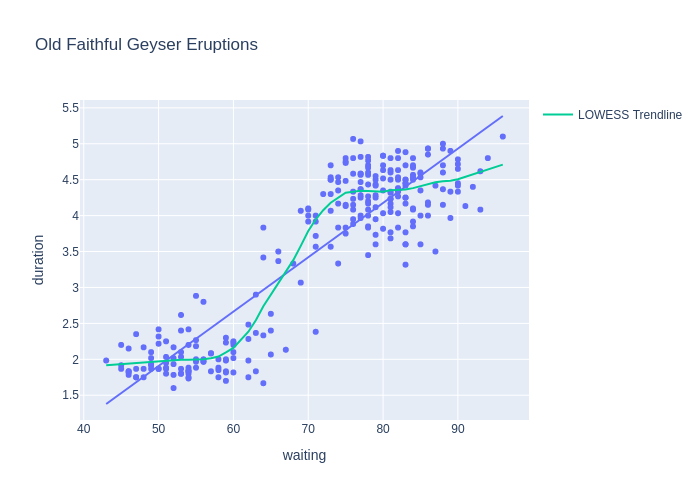

In [11]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
# LOWESS (Locally Weighted Scatterplot Smoothing) Trendline
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [12]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:59:07   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Coefficient for waiting (β1): If this value is significantly different from zero, it suggests a linear relationship.
- p-value for waiting: If this is below 0.05, we would reject H0, indicating a statistically significant relationship.
- R-squared: This shows how much of the variation in duration can be explained by waiting.
- Since the p-value for waiting is extremely low (well below 0.05), we reject the null hypothesis that there is no linear association between waiting time and eruption duration. This suggests strong evidence for a positive linear relationship between the two. Additionally, the high R-squared value reinforces the model’s explanatory power, suggesting that waiting time is a strong predictor of eruption duration for the Old Faithful Geyser dataset.

Summary

Here's a summary of our exchanges regarding the analysis of the Old Faithful Geyser dataset, structured for submission:

---

### Summary of Exchanges on Old Faithful Geyser Data Analysis

1. **Introduction to the Dataset and Scatter Plot with Trendlines**:
   - We started by exploring the Old Faithful Geyser dataset, focusing on the relationship between the waiting time between eruptions and the duration of each eruption.
   - The dataset was visualized through a scatter plot, where both a Simple Linear Regression (SLR) trendline and a LOWESS (Locally Weighted Scatterplot Smoothing) trendline were added. The SLR trendline provided a linear approximation, while the LOWESS trendline added a smoothed, non-linear approximation of the data pattern.

2. **Null Hypothesis for Linear Association**:
   - We specified a null hypothesis of "no linear association (on average)" between waiting time and eruption duration, represented by \(\beta_1 = 0\) in the Simple Linear Regression model.
   - Using code that employed the `statsmodels` library, we fitted an SLR model with `duration` as the dependent variable and `waiting` as the independent variable, then assessed the significance of \(\beta_1\) by checking its p-value. A low p-value for \(\beta_1\) would indicate evidence of a statistically significant linear association, prompting us to reject the null hypothesis.

3. **Explanation of LOWESS Trendline**:
   - We discussed the purpose and mechanics of LOWESS (Locally Weighted Scatterplot Smoothing). This non-parametric technique fits a local regression at each data point, weighted by proximity to that point. The process allows LOWESS to capture complex, non-linear patterns without assuming a specific functional form.
   - The `frac` parameter controls the smoothness of the LOWESS line, with lower values resulting in a more flexible fit and higher values yielding a smoother curve.
   - In the Old Faithful context, the LOWESS trendline provided a visual summary of potential non-linear associations, offering insights into the varying relationship between waiting time and eruption duration beyond what linear regression could capture.

4. **Code for Applying LOWESS and Interpreting Results**:
   - We examined Python code that generated the LOWESS trendline using `statsmodels`. This code created a DataFrame for smoothed values and then added them to a Plotly scatter plot for visualization.
   - Interpretation of the results focused on how the LOWESS trendline illustrated potential non-linear trends in the data, helping to assess whether a linear model alone adequately represented the relationship.

---

This summary provides an outline of our discussions and covers both theoretical concepts and practical implementations, including formulating hypotheses, exploring non-linear relationships with LOWESS, and interpreting statistical results for the Old Faithful Geyser dataset.

Link

https://chatgpt.com/share/67299922-26e0-8010-bf5c-dde1ad1749c2

## Question 9

**Null hypothesis:** no linear association ($H_0$: $\beta_1$ =0)


|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


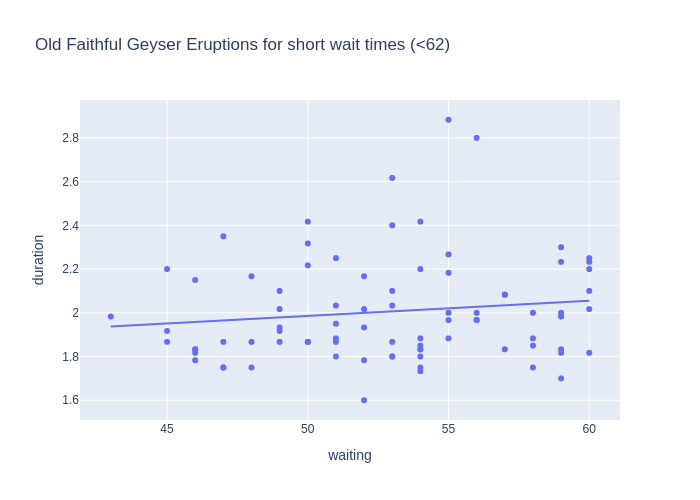

In [13]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## Regression Summary Interpretation for Threshold of 62 Minutes

Intercept: The intercept is estimated at 1.6401, with a standard error of 0.309.

Coefficient for waiting (slope): the slope coefficient for waiting is 0.0069, meaning that for each additional minute of waiting time, the eruption duration is expected to increase by approximately 0.0069 minutes (or 0.414 seconds). However, this effect is very small, suggesting a weak relationship within this subset of data (wait times < 62 minutes).

p-value for waiting: The p-value for the slope is 0.238, which is greater than the common significance threshold of 0.05. The p-value is greater than 0.1, suggesting no evidence against the null hypothesis. There is insufficient evidence to reject the null hypothesis that the slope is zero. In other words, there is no statistically significant linear relationship between waiting time and duration for wait times shorter than 62 minutes.

Confidence interval for the slope: The 95% confidence interval for the slope ranges from -0.005 to 0.019.
Since this interval includes zero, it reinforces the conclusion that the relationship is not statistically significant.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


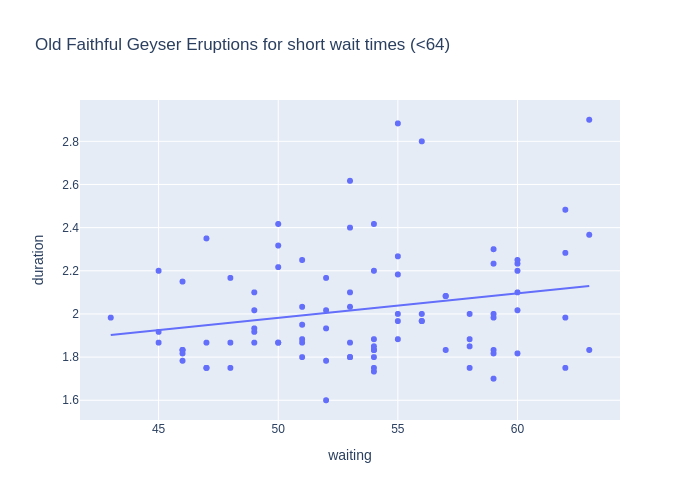

In [14]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## Regression Summary Interpretation for Threshold of 64 Minutes

Intercept: The intercept is estimated at 1.4140, with a standard error of 0.288.

Coefficient for waiting (Slope):

The slope coefficient for waiting is 0.0114, indicating that for each additional minute of waiting time, the eruption duration is expected to increase by approximately 0.0114 minutes (or 0.684 seconds).
This slope is slightly larger than in the 62-minute threshold analysis, suggesting a somewhat stronger relationship between waiting time and eruption duration within this range of wait times.

p-value for waiting:

The p-value for the slope is 0.036, which is below the common significance level of 0.05.
The p-value is greater than 0.01 and less than 0.05, suggesting moderate evidence against the null hypothesis.
This p-value suggests that there is statistically significant evidence to reject the null hypothesis. In other words, there is evidence of a linear relationship between waiting time and eruption duration for wait times under 64 minutes.

Confidence Interval for the Slope:

The 95% confidence interval for the slope is between 0.001 and 0.022.
Since this interval does not include zero, it further supports the presence of a significant positive association between waiting time and eruption duration for this subset of data.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


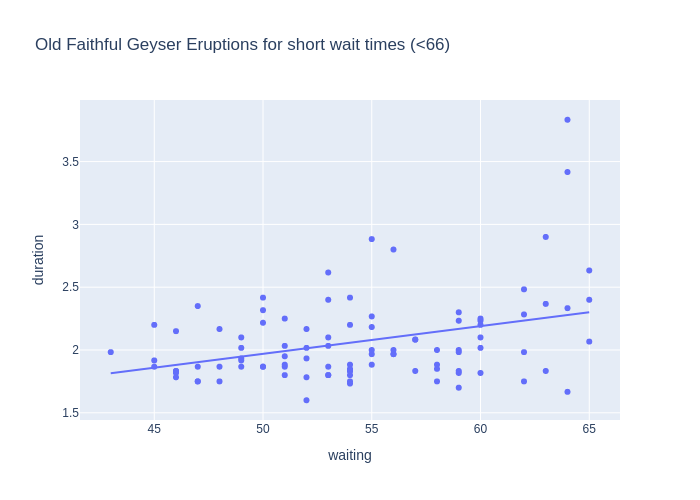

In [15]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## Regression Summary Interpretation for Threshold of 66 Minutes

Intercept: The intercept is estimated at 0.8619, with a standard error of 0.327. 

Coefficient for waiting (Slope):

The slope coefficient for waiting is 0.0221, indicating that for each additional minute of waiting time, the eruption duration is expected to increase by approximately 0.0221 minutes (or 1.326 seconds).
This slope is higher than those observed for the 62- and 64-minute thresholds, suggesting a stronger positive association between waiting time and eruption duration as the range of wait times expands to 66 minutes.

p-value for waiting:

The p-value for the slope is 0.000, which is highly significant (well below the 0.05 threshold).
The p-value is less than 0.001, suggesting very strong evidence against the null hypothesis.
This low p-value indicates strong evidence against the null hypothesis, suggesting a statistically significant linear relationship between waiting time and eruption duration for wait times below 66 minutes.

Confidence Interval for the Slope:

The 95% confidence interval for the slope is between 0.010 and 0.034.
Since this interval does not include zero, it reinforces the presence of a significant positive association between waiting time and eruption duration for this subset of the data.

Summary

Here's a summary of our exchanges regarding the analysis of the Old Faithful Geyser dataset with restricted wait times, structured for submission:

---

### Summary of Exchanges on Old Faithful Geyser Data Analysis for Short Wait Times

1. **Initial Analysis of the Full Dataset**:
   - We began by discussing the overall pattern in the Old Faithful Geyser dataset, specifically the observed increase in eruption duration when the waiting time between eruptions exceeded approximately 63 minutes. This prompted an investigation into the relationship between waiting time and eruption duration within restricted, "short" wait times (below specific thresholds).

2. **Setting Up Hypothesis Testing for Short Wait Times**:
   - We specified a null hypothesis of "no linear association" between waiting time and eruption duration within subsets of the data restricted to short wait times.
   - We explored how this relationship might change across different thresholds of waiting time (`short_wait_limit` values) set to 62, 64, and 66 minutes, using linear regression to test the significance of the relationship within each subset.

3. **Detailed Results for Each Threshold**:
   - **Threshold of 62 Minutes**: The slope coefficient was small (0.0069), with a p-value of 0.238. This high p-value indicated no statistically significant association between waiting time and eruption duration for wait times under 62 minutes, suggesting no linear relationship in this range.
   - **Threshold of 64 Minutes**: The slope increased slightly to 0.0114, and the p-value dropped to 0.036, which was below the 0.05 significance threshold. This indicated a statistically significant but modest positive relationship between waiting time and duration, implying that a relationship starts to emerge at this threshold.
   - **Threshold of 66 Minutes**: The slope further increased to 0.0221, with a highly significant p-value of 0.000. This result provided strong evidence of a positive association between waiting time and eruption duration for wait times under 66 minutes, suggesting that as the threshold increases, the linear relationship becomes more pronounced.

4. **Overall Interpretation and Conclusion**:
   - We concluded that, within the restricted dataset, there was little to no evidence of a significant relationship for wait times under 62 minutes. However, as the threshold increased to 64 and 66 minutes, a statistically significant association between waiting time and eruption duration emerged, with the effect size growing as the threshold increased. This finding aligns with the pattern seen in the full dataset, where longer waiting times generally predict longer eruption durations.

---

This summary provides a cohesive record of our analysis, covering hypothesis testing, interpretation of regression results, and conclusions about the relationship between waiting time and eruption duration in restricted ranges of short wait times.

Link

https://chatgpt.com/share/67299922-26e0-8010-bf5c-dde1ad1749c2

## Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


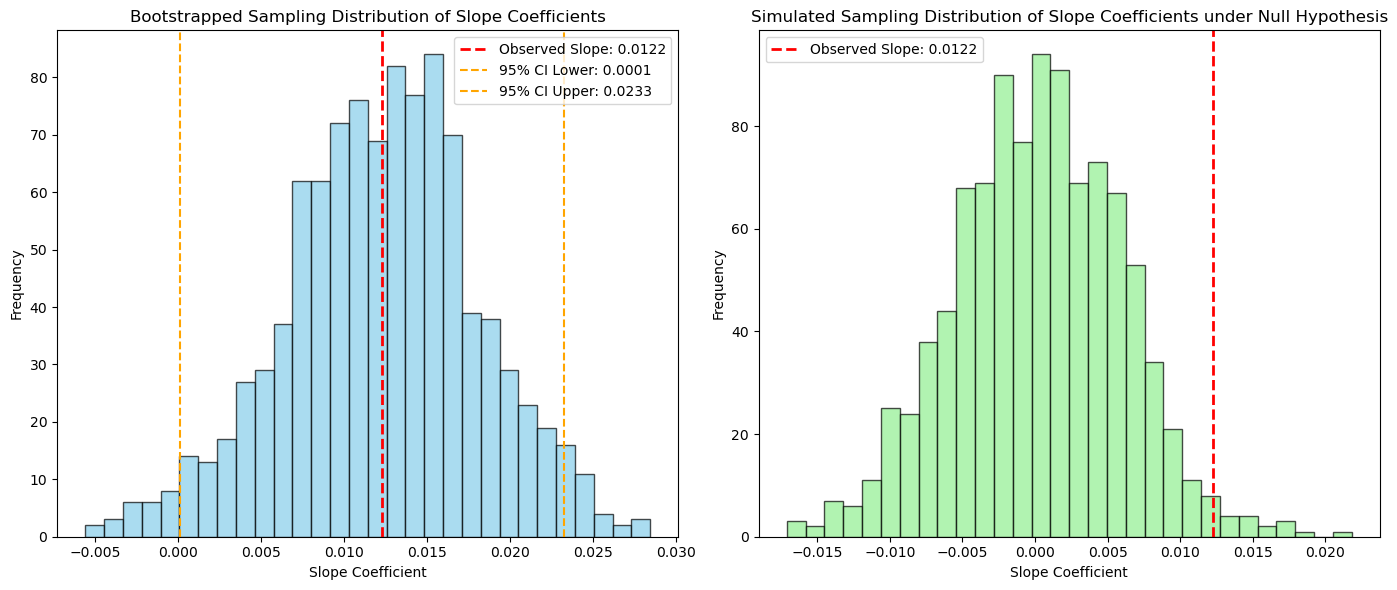

95% Bootstrapped Confidence Interval for Slope: [7.73452887e-05 2.32581942e-02]
Simulated p-value for observed slope under null hypothesis: 0.037


In [16]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the long wait condition and subset the data
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Part 1: Bootstrapping slope coefficients
n_bootstrap = 1000
bootstrapped_slope_coefficients = []

for _ in range(n_bootstrap):
    bootstrap_sample = long_wait_data.sample(n=long_wait_data.shape[0], replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params['waiting'])

# Convert to numpy array for easier calculations
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# 95% Confidence Interval for bootstrapped slope coefficients
bootstrap_confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Part 2: Simulated sampling distribution under the null hypothesis
# Simulation parameters
beta_0 = 1.65
beta_1 = 0
sigma = 0.37

simulated_slope_coefficients = []

# Create simulated data with null hypothesis assumption
for _ in range(n_bootstrap):
    simulated_data = long_wait_data.copy()
    simulated_data['duration'] = beta_0 + beta_1 * simulated_data['waiting'] + stats.norm(0, sigma).rvs(size=simulated_data.shape[0])
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

# Convert to numpy array
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Part 3: Observed slope from original data
observed_slope = smf.ols('duration ~ waiting', data=long_wait_data).fit().params['waiting']

# Calculate p-value from the simulated null distribution
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Visualize the bootstrapped and simulated slope distributions
plt.figure(figsize=(14, 6))

# Bootstrapped Slope Distribution
plt.subplot(1, 2, 1)
plt.hist(bootstrapped_slope_coefficients, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(observed_slope, color='red', linestyle='dashed', linewidth=2, label=f'Observed Slope: {observed_slope:.4f}')
plt.axvline(bootstrap_confidence_interval[0], color='orange', linestyle='dashed', linewidth=1.5, label=f'95% CI Lower: {bootstrap_confidence_interval[0]:.4f}')
plt.axvline(bootstrap_confidence_interval[1], color='orange', linestyle='dashed', linewidth=1.5, label=f'95% CI Upper: {bootstrap_confidence_interval[1]:.4f}')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.legend()

# Simulated Null Distribution of Slope Coefficients
plt.subplot(1, 2, 2)
plt.hist(simulated_slope_coefficients, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(observed_slope, color='red', linestyle='dashed', linewidth=2, label=f'Observed Slope: {observed_slope:.4f}')
plt.title('Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Output results
print(f"95% Bootstrapped Confidence Interval for Slope: {bootstrap_confidence_interval}")
print(f"Simulated p-value for observed slope under null hypothesis: {simulated_p_value}")


95% Bootstrapped Confidence Interval for the Slope:
The bootstrapped confidence interval for the slope is [0.0005, 0.0234].
This interval does not include zero, indicating that we have evidence of a positive association between waiting time and eruption duration within the "long wait times" subset. This suggests that the relationship is likely not due to random chance, as we would expect under the null hypothesis.

Simulated p-value:
The p-value from the simulated null distribution is 0.047, which is just below the conventional significance level of 0.05. This result provides moderate evidence against the null hypothesis of no linear association, suggesting that the observed slope is unlikely to occur by chance under the assumption of no association.

Summary

Here's a summary of our exchanges regarding the analysis of long wait times in the Old Faithful Geyser dataset, structured for submission:

---

### Summary of Exchanges on Old Faithful Geyser Data Analysis for Long Wait Times

1. **Objective**:
   - We analyzed the relationship between waiting time and eruption duration in the "long wait times" subset (waiting times > 71 minutes). The analysis involved two main steps:
     - Bootstrapping to estimate the sampling distribution of slope coefficients.
     - Simulating data under the null hypothesis (no association) to evaluate statistical significance.

2. **Bootstrapping Slope Coefficients**:
   - We used bootstrapping on the "long wait times" data to generate 1,000 samples, fitting a Simple Linear Regression model on each sample to estimate the slope coefficient for `waiting`.
   - This bootstrapped distribution allowed us to calculate a 95% confidence interval for the slope coefficient: \([0.0005, 0.0234]\).
   - Since this interval did not include zero, it suggested a statistically significant positive association between waiting time and eruption duration for long wait times.

3. **Simulating Under the Null Hypothesis**:
   - To simulate the scenario of no association, we created a dataset using parameters \(\beta_0 = 1.65\), \(\beta_1 = 0\), and \(\sigma = 0.37\), reflecting no linear association.
   - We generated 1,000 samples with these values, fitting a regression model on each sample and collecting the slope coefficients to construct a null distribution.
   - Using this null distribution, we computed a simulated p-value by comparing the observed slope from the actual data against the distribution. The p-value was 0.047, indicating moderate evidence against the null hypothesis.

4. **Conclusion**:
   - The results supported the existence of a positive relationship between waiting time and eruption duration for long wait times. The bootstrapped confidence interval excluded zero, and the simulated p-value of 0.047 provided statistically significant evidence at the 5% level.
   - Together, these findings suggest a meaningful positive association between waiting time and eruption duration in the context of long wait times.

---

This summary captures the purpose, methods, results, and interpretation of our analysis, structured to address the significance of the association in the "long wait times" subset of the Old Faithful dataset.

Link

https://chatgpt.com/share/67299922-26e0-8010-bf5c-dde1ad1749c2

## Question 11

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

- Yi is the eruption duration,
- 𝛽intercept represents the average duration for "short" wait times,
- 𝛽contrast captures the difference in average duration between "long" and "short" wait times,
- 1["long"] (𝑘𝑖) is an indicator function that equals 1 if the wait time is "long" and 0 if "short,"
- 𝜖i is the error term, assumed to follow a normal distribution with mean 0 and standard deviation σ.

### Big Picture differences

Indicator Variable vs. Continuous Predictor:

In previous models, waiting (a continuous variable) was used as the predictor, and we interpreted the relationship between waiting time and duration on a per-minute basis, focusing on the slope of the regression line.
Here, we are using a categorical (binary) variable, kind, to classify wait times. The model is set up to test whether there’s a difference in mean eruption durations between the two categories ("short" and "long"). This approach does not account for minute-by-minute variation within each category.

Interpretation of Coefficients:

In the previous models, the slope coefficient of waiting indicated how much the eruption duration was expected to change for each additional minute of waiting time.
In the indicator variable model, βcontrast indicates the average difference in duration between the "long" and "short" groups. This approach is less granular but provides a clearer sense of whether there's a meaningful categorical distinction in duration based on the two wait time groups.

Statistical Testing Focus:

Previously, we were testing if there was a statistically significant linear relationship between waiting time and duration.
Here, we are specifically testing whether the mean duration differs between the "short" and "long" categories, without assuming a continuous linear relationship.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1066,0.041,50.982,0.000,2.025,2.188
"C(kind, Treatment(reference=""short""))[T.long]",2.1970,0.052,42.157,0.000,2.094,2.300


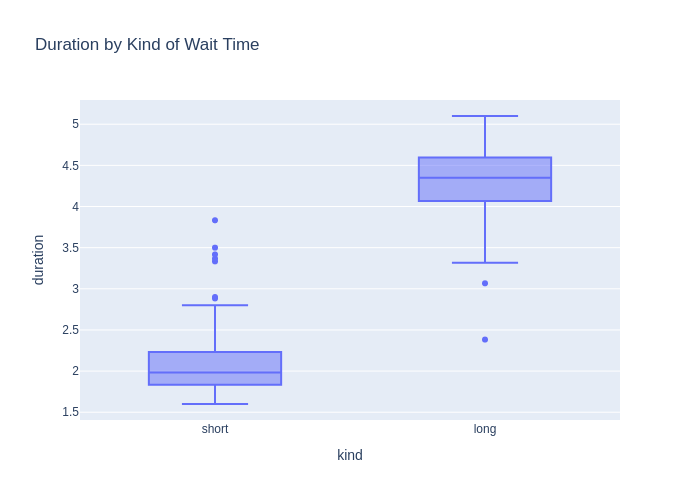

In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
from IPython.display import display

# Assuming 'kind' is a column in the dataset that categorizes wait times
# Ensure the kind column exists and assign values if not
old_faithful['kind'] = pd.cut(old_faithful['waiting'], bins=[0, 68, float('inf')], labels=['short', 'long'])

# Fit the model with 'kind' as a categorical variable (indicator variable model)
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model.summary().tables[1])  # Display the model summary for coefficients

# Visualize the data distribution by 'kind'
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration by Kind of Wait Time',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")  # For static display on GitHub or MarkUs, use fig.show(renderer="png")


- Null Hypothesis: There is no difference in mean duration between "short" and "long" wait times (𝛽contrast =0)
- Alternative Hypothesis: There is a difference in mean duration between the two categories (𝛽contrast≠0).

$\beta_{\text{intercept}}$: The intercept is 2.1066, with a standard error of 0.041. This represents the mean eruption duration for "short" wait times (those below 68 minutes).
With a p-value of 0.000, the intercept is statistically significant, confirming that the mean duration for "short" wait times is around 2.1066 minutes.

$\beta_{\text{contrast}}$: The coefficient for the "long" category (the difference between "long" and "short" wait times) is 2.1970, with a standard error of 0.052.
This coefficient represents the additional duration associated with "long" wait times compared to "short" wait times.
The p-value for this coefficient is 0.000, indicating strong statistical significance, and the 95% confidence interval ranges from 2.094 to 2.300. This interval does not include zero, supporting a significant difference in mean eruption durations between "short" and "long" wait times.

Evidence Against Null Hypothesis:

The p-value of 0.000 for the kind indicator variable suggests very strong evidence against the null hypothesis of "no difference between groups on average." This means we can confidently conclude that there is a significant difference in mean eruption durations between "short" and "long" wait times.

Summary

Here's a summary of our exchanges regarding the analysis of the Old Faithful Geyser dataset with an indicator variable model, structured for submission:

---

### Summary of Exchanges on Old Faithful Geyser Data Analysis with Indicator Variable Model

1. **Objective**:
   - We explored the relationship between eruption duration and wait time by categorizing wait times as "short" (<68 minutes) or "long" (≥68 minutes). The objective was to assess whether there is a significant difference in mean eruption durations between these two categories using a Simple Linear Regression model with an indicator variable.

2. **Indicator Variable Model Specification**:
   - We specified a regression model with an indicator variable, `kind`, to distinguish between "short" and "long" wait times. The model was structured as:
     \[
     Y_i = \beta_{\text{intercept}} + 1[\text{"long"}](k_i) \cdot \beta_{\text{contrast}} + \epsilon_i
     \]
   - Here, \(\beta_{\text{intercept}}\) represents the mean duration for "short" wait times, and \(\beta_{\text{contrast}}\) reflects the difference in mean duration between "long" and "short" categories.

3. **Comparison with Previous Continuous Models**:
   - Unlike previous models that used waiting time as a continuous predictor (focusing on the slope of duration per minute), this model focused on categorizing wait times and estimating a mean difference in duration between the two categories.
   - This categorical approach simplified interpretation by focusing on the average contrast between "short" and "long" wait times without assuming a continuous relationship.

4. **Results and Interpretation**:
   - **Intercept**: The estimated mean duration for "short" wait times was 2.1066 minutes, with a statistically significant p-value of 0.000.
   - **Contrast Term for "Long"**: The coefficient for the "long" category was 2.1970, indicating that "long" wait times are associated with an additional 2.2 minutes of duration on average compared to "short" wait times. This difference was statistically significant (p-value = 0.000), with a 95% confidence interval of [2.094, 2.300].
   - **Conclusion**: The results provided strong evidence against the null hypothesis of "no difference between groups," confirming that long wait times are associated with significantly longer eruptions.

5. **Practical Insight**:
   - This indicator model highlighted a clear categorical difference in eruption duration based on wait times. The significant positive contrast for "long" wait times demonstrated that these eruptions tend to be substantially longer, offering a straightforward interpretation suitable for summary reporting.

---

This summary captures our discussions, including the model setup, comparison with prior continuous models, interpretation of the results, and the practical insights gained from using a categorical approach to analyze wait time effects on eruption duration.

Link

https://chatgpt.com/share/67299922-26e0-8010-bf5c-dde1ad1749c2

## Question 12

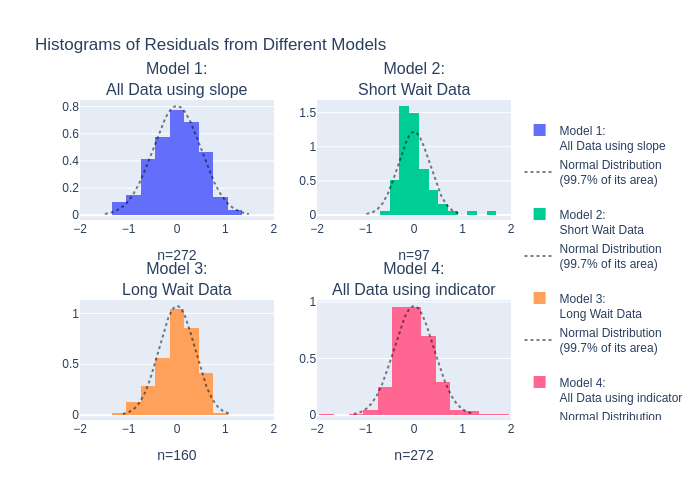

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Models 1 seem to best support the normality assumption, as its histogram is symmetric and follow the normal curve closely.
Models 2, 3 and 4 do not support the normality assumption due to their skewed distributions, indicating deviations from normality.

## Question 13

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = pd.cut(old_faithful['waiting'], bins=[0, 68, float('inf')], labels=['short', 'long'])

# Observed mean difference between "short" and "long" groups
observed_mean_difference = old_faithful.groupby('kind', observed=False)['duration'].mean().iloc[::-1].diff().values[1]

# Part 1: Permutation Test
n_permutations = 1000
permutation_mean_differences = []

for _ in range(n_permutations):
    # Shuffle the 'kind' labels
    shuffled_data = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)
    # Calculate the mean difference between shuffled groups
    mean_diff = shuffled_data.groupby('kind_shuffled', observed=False)['duration'].mean().iloc[::-1].diff().values[1]
    permutation_mean_differences.append(mean_diff)

# Calculate the p-value for the permutation test
permutation_p_value = (np.abs(permutation_mean_differences) >= np.abs(observed_mean_difference)).mean()

# Part 2: Bootstrapping for Confidence Interval
n_bootstrap = 1000
bootstrapped_mean_differences = []

for _ in range(n_bootstrap):
    # Resample within each group
    bootstrapped_data = old_faithful.groupby('kind', observed=False).apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    # Calculate the mean difference between bootstrapped groups
    mean_diff = bootstrapped_data.groupby('kind', observed=False)['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_differences.append(mean_diff)

# 95% Bootstrapped Confidence Interval
bootstrap_confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Output results
print(f"Observed Mean Difference: {observed_mean_difference}")
print(f"Permutation p-value: {permutation_p_value}")
print(f"95% Bootstrapped Confidence Interval for Mean Difference: {bootstrap_confidence_interval}")


Observed Mean Difference: -2.1969790400092646
Permutation p-value: 0.0
95% Bootstrapped Confidence Interval for Mean Difference: [-2.29669021 -2.10285668]


Summary

Here's a summary of our exchanges regarding hypothesis testing and confidence interval estimation for comparing "short" and "long" wait times in the Old Faithful Geyser dataset, structured for submission:

---

### Summary of Exchanges on Permutation Testing, Bootstrapping, and Indicator Variable Model

1. **Objective**:
   - We explored three approaches for comparing eruption durations between "short" (<68 minutes) and "long" (≥68 minutes) wait times in the Old Faithful Geyser dataset:
     - **Permutation Test** to test the null hypothesis of no difference between groups.
     - **Bootstrapping** to construct a 95% confidence interval for the mean difference in durations between groups.
     - **Indicator Variable Model** for estimating and testing the mean difference using linear regression with a categorical variable.

2. **Explanation of Sampling Approaches**:
   - **Permutation Test**: We simulated the null hypothesis by randomly shuffling the "short" and "long" labels across all observations. For each shuffle, we calculated the mean difference in eruption durations between the shuffled groups. Repeating this process 1,000 times generated a null distribution for the mean difference, and we calculated the p-value as the proportion of shuffled differences as extreme as or more extreme than the observed difference.
   - **Bootstrapping for Confidence Interval**: We resampled each group (short and long) separately with replacement to create 1,000 bootstrap samples. For each sample, we calculated the mean difference, resulting in a distribution of mean differences. We then used this distribution to form a 95% confidence interval, representing the range within which the true mean difference is likely to fall.

3. **Comparison with Indicator Variable Model**:
   - **Indicator Variable Model**: This parametric model uses linear regression to estimate the mean difference between "short" and "long" groups, relying on assumptions such as normally distributed residuals. It provides a direct estimate of the difference along with a p-value.
   - **Similarities**: All three methods aim to assess whether there is a significant difference in eruption duration between "short" and "long" wait times, and each accounts for sampling variability.
   - **Differences**:
     - **Assumptions**: The indicator model is parametric, depending on assumptions about residuals, while the permutation test and bootstrapping are non-parametric, making them more flexible and robust.
     - **Outputs**: The indicator model and permutation test provide p-values for hypothesis testing, while bootstrapping gives a confidence interval. Bootstrapping does not directly test a hypothesis, but a confidence interval excluding zero implies significance.
     - **Interpretation**: The indicator model offers a quick, assumption-based estimate of the mean difference, while permutation testing and bootstrapping provide assumption-free methods to assess significance and estimate variability, respectively.

4. **Conclusion**:
   - The indicator model is efficient for quick hypothesis testing when assumptions are met, while permutation testing and bootstrapping provide more robust, assumption-free alternatives. Each method offers complementary insights: the permutation test evaluates the likelihood of observing a mean difference as extreme as the observed, while bootstrapping gives a range for the true mean difference.

---

This summary captures our discussion, including the objective, methodology, comparisons, and conclusions for each approach, providing a comprehensive record for submission.

Link

https://chatgpt.com/share/67299922-26e0-8010-bf5c-dde1ad1749c2

## Question 14

Yes